In [1]:
# url:
    # https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96
# article title:
    # Machine Learning with Datetime Feature Engineering: Predicting Healthcare Appointment No-Shows
# article by:
    # Andrew Long
# published by:
    # towards data science

In [2]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# getting the shape of the dataframe
df.shape

(110527, 14)

In [5]:
# getting the unique values from each columns for analtzing process
for col in df:
    print(col,df[col].unique())

PatientId [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID [5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender ['F' 'M']
ScheduledDay ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age 

In [6]:
# getting the unique values from each columns for analtzing process

print('shape',df.shape)

for col in df:
    print('')
    print(col,df[col].value_counts())

shape (110527, 14)

PatientId 8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
7.579746e+13    62
                ..
1.779297e+13     1
9.985120e+11     1
3.256827e+13     1
9.232297e+13     1
5.133834e+14     1
Name: PatientId, Length: 62299, dtype: int64

AppointmentID 5771266    1
5680512    1
5602682    1
5598584    1
5584243    1
          ..
5686642    1
5692785    1
5647727    1
5645678    1
5769215    1
Name: AppointmentID, Length: 110527, dtype: int64

Gender F    71840
M    38687
Name: Gender, dtype: int64

ScheduledDay 2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-12T15:27:10Z     1
2016-05-19T14:01:45Z     1
2016-05-25T08:47:17Z     1
2016-04-06T14:41:56Z     1
2016-05-10T09:59:45Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

AppointmentDay 2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:

In [7]:
# getting the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# investigating the column 'No_show'
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [9]:
# defining a binary columns output_label to indicate Yes = 1, No = 0
df['OUTPUT_LABEL'] = (df['No-show'] == 'Yes').astype('int')
df['OUTPUT_LABEL'].unique()

array([0, 1])

In [10]:
# defining a pervalence calculator function
def calc_prevalence(y):
    return (sum(y)/len(y))

In [11]:
# checking the prevalence of the OUTPUT_LABEL
calc_prevalence(df.OUTPUT_LABEL.values)

0.20193255946510807

In [12]:
# 0.2 i.e 1/5 means that 1 in 5 patients will miss thier shceduled appointment

In [13]:
# woking with ScheduledDay and AppointmentDay columns

In [14]:
df.ScheduledDay.head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

In [15]:
df.AppointmentDay.head()

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [16]:
# here the dtype for both columns is object meaning that pandas is viewing these values as strings
# ScheduledDay has times (hrs : mins : secs) but AppointmentDay doesn't have it

In [17]:
# using to_datetime to convert strings into internal datetimes
# any error occured here will turn into a Nat not-a-datetime
# can also use the format parameter, but need to specify what to do with errors
# the format parameter will speed up the execution of the respective to_datetime line

In [18]:
# convetring the ScheduledDay column's datatype from string to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce',)
df['ScheduledDay']

0        2016-04-29 18:38:08
1        2016-04-29 16:08:27
2        2016-04-29 16:19:04
3        2016-04-29 17:29:31
4        2016-04-29 16:07:23
                 ...        
110522   2016-05-03 09:15:35
110523   2016-05-03 07:27:33
110524   2016-04-27 16:03:52
110525   2016-04-27 15:09:23
110526   2016-04-27 13:30:56
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

In [19]:
# convetring the AppointmentDay column's datatype from string to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce',)
df['AppointmentDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

In [20]:
# checking whether the date columns' elements are valid or not
# i.e checking for null value.. it it gets, throws an error
assert df.ScheduledDay.isnull().sum() == 0, 'missing ScheduledDay dates'
assert df.AppointmentDay.isnull().sum() == 0, 'missing AppointmentDay dates'

In [21]:
# checking the dtyoe of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  OUTPUT_LABEL    110527 non-null  int

In [22]:
# there are ~40k appointments that were scheduled after the appointment datetime
(df.ScheduledDay > df.AppointmentDay).sum()

38568

In [23]:
# shifting all the appointment dates at the end of the day
# previously these dates were in the start of the day
# this will reduce almost all of the appointment before schedule problems
df.AppointmentDay = df.AppointmentDay + pd.Timedelta('1d') - pd.Timedelta('1s')

In [24]:
#viewing the appointment dates
df.AppointmentDay

0        2016-04-29 23:59:59
1        2016-04-29 23:59:59
2        2016-04-29 23:59:59
3        2016-04-29 23:59:59
4        2016-04-29 23:59:59
                 ...        
110522   2016-06-07 23:59:59
110523   2016-06-07 23:59:59
110524   2016-06-07 23:59:59
110525   2016-06-07 23:59:59
110526   2016-06-07 23:59:59
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

In [25]:
# checking for the appointment before schedule dates
(df.ScheduledDay > df.AppointmentDay).sum()

5

In [26]:
# only 5 days are present where appointments come before shceduling before 1 day
# we can drop these 5 rows
df= df.loc[ (df.ScheduledDay <= df.AppointmentDay)].copy()

In [27]:
# breaking the date into simpler elements like year, month, day, ...
# when working with the week
# we need to be careful because the first few days of the day may be 53 if that week begins in the prior year

# for ScheduledDay column
df['ScheduledDay_year'] = df['ScheduledDay'].dt.year
df['ScheduledDay_month'] = df['ScheduledDay'].dt.month
df['ScheduledDay_week'] = df['ScheduledDay'].dt.isocalendar().week
df['ScheduledDay_day'] = df['ScheduledDay'].dt.day
df['ScheduledDay_hour'] = df['ScheduledDay'].dt.hour
df['ScheduledDay_minute'] = df['ScheduledDay'].dt.minute
df['ScheduledDay_dayofweek'] = df['ScheduledDay'].dt.dayofweek

In [28]:
# verifying changes for ScheduledDay
df[['ScheduledDay', 'ScheduledDay_year', 'ScheduledDay_month', 'ScheduledDay_week', 'ScheduledDay_day', 'ScheduledDay_hour', 'ScheduledDay_minute', 'ScheduledDay_dayofweek']]

,ScheduledDay,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek
0,2016-04-29 18:38:08,2016,4,17,29,18,38,4
1,2016-04-29 16:08:27,2016,4,17,29,16,8,4
2,2016-04-29 16:19:04,2016,4,17,29,16,19,4
3,2016-04-29 17:29:31,2016,4,17,29,17,29,4
4,2016-04-29 16:07:23,2016,4,17,29,16,7,4
...,...,...,...,...,...,...,...,...
110522,2016-05-03 09:15:35,2016,5,18,3,9,15,1
110523,2016-05-03 07:27:33,2016,5,18,3,7,27,1
110524,2016-04-27 16:03:52,2016,4,17,27,16,3,2
110525,2016-04-27 15:09:23,2016,4,17,27,15,9,2


In [29]:
# for AppointmentDay column
df['AppointmentDay_year'] = df['AppointmentDay'].dt.year
df['AppointmentDay_month'] = df['AppointmentDay'].dt.month
df['AppointmentDay_week'] = df['AppointmentDay'].dt.isocalendar().week
df['AppointmentDay_day'] = df['AppointmentDay'].dt.day
df['AppointmentDay_hour'] = df['AppointmentDay'].dt.hour
df['AppointmentDay_minute'] = df['AppointmentDay'].dt.minute
df['AppointmentDay_dayofweek'] = df['AppointmentDay'].dt.dayofweek

In [30]:
# verifying changes for AppointmentDay
df[['AppointmentDay', 'AppointmentDay_year', 'AppointmentDay_month', 'AppointmentDay_week', 'AppointmentDay_day', 'AppointmentDay_hour', 'AppointmentDay_minute', 'AppointmentDay_dayofweek']]

,AppointmentDay,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek
0,2016-04-29 23:59:59,2016,4,17,29,23,59,4
1,2016-04-29 23:59:59,2016,4,17,29,23,59,4
2,2016-04-29 23:59:59,2016,4,17,29,23,59,4
3,2016-04-29 23:59:59,2016,4,17,29,23,59,4
4,2016-04-29 23:59:59,2016,4,17,29,23,59,4
...,...,...,...,...,...,...,...,...
110522,2016-06-07 23:59:59,2016,6,23,7,23,59,1
110523,2016-06-07 23:59:59,2016,6,23,7,23,59,1
110524,2016-06-07 23:59:59,2016,6,23,7,23,59,1
110525,2016-06-07 23:59:59,2016,6,23,7,23,59,1


In [31]:
# exploring the appointment dates
df.groupby('AppointmentDay_year').size()

AppointmentDay_year
2016    110522
dtype: int64

In [32]:
df.groupby('AppointmentDay_month').size()

AppointmentDay_month
4     3235
5    80836
6    26451
dtype: int64

In [33]:
df.groupby('AppointmentDay_dayofweek').size()

AppointmentDay_dayofweek
0    22714
1    25638
2    25866
3    17246
4    19019
5       39
dtype: int64

In [34]:
# from the above results, we can see that
# all the appointments are in the same 2016
# all the appointments are in April, May, and June (4,5,6)
# major appointment dates range from Monday to Friday
# there are only few (39) appointments on saturday and no in sunday 

# year is preferred to be avoided as the data set contains past year and the model is to predict the future using future data
# here are only three months, this incomplete teature / columns should not be used

In [35]:
# lets see if dayofweek is predictive of no-show
df.groupby('AppointmentDay_dayofweek').apply(lambda g: calc_prevalence(g.OUTPUT_LABEL.values))

AppointmentDay_dayofweek
0    0.206437
1    0.200874
2    0.196861
3    0.193494
4    0.212261
5    0.230769
dtype: float64

In [36]:
# according to the data
# more people skip their appointments on Friday and Saturday

In [37]:
# dt.total_seconds() is used because
# dt.days rounds to the nearest day
# dt.days is slower than dt.total_seconds
# dt.total_seconds can give seconds, minutes, hours, days, ...

df['delta_days']= (df['AppointmentDay'] - df['ScheduledDay']).dt.total_seconds()/(60*60*24)
df.delta_days.describe()

count    110522.000000
mean         10.714825
std          15.244190
min           0.135475
25%           0.653857
50%           4.474763
75%          15.320628
max         179.554861
Name: delta_days, dtype: float64

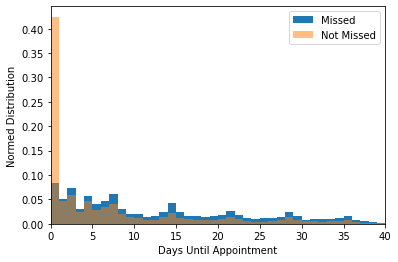

In [38]:
# plotting a histogram of the two classes

plt.hist(df.loc[df.OUTPUT_LABEL == 1, 'delta_days'], label= 'Missed', bins=range(0,60,1), density= True)
plt.hist(df.loc[df.OUTPUT_LABEL == 0, 'delta_days'], label= 'Not Missed', bins=range(0,60,1), density= True, alpha= 0.5)

plt.xlabel('Days Until Appointment')
plt.ylabel('Normed Distribution')
plt.xlim(0,40)

plt.legend(loc='best')
plt.show()

In [39]:
# from the above histogram, it is seen that
# most of the not missed people scheduled the appointment on the same day
# walk-in appointments could have been included in this dataset
# the model will be biased towards this
# the model will say not-missed if you schedule the appointment on the same day

In [40]:
# splitting samples
# train-validation/test  will be split 70-30 respectively
# it is importsnt to shuffle the dataset

In [74]:
# shuffling the samples
df_final = df.sample( n= len(df), random_state= 42)
df_final = df_final.reset_index(drop = True)
df_final

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,ScheduledDay_minute,ScheduledDay_dayofweek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek,delta_days
0,7.966198e+14,5684809,M,2016-05-11 09:11:58,2016-05-11 23:59:59,0,SÃO BENEDITO,0,0,0,...,11,2,2016,5,19,11,23,59,2,0.616678
1,5.867214e+14,5748536,F,2016-05-31 07:07:59,2016-06-02 23:59:59,72,PARQUE MOSCOSO,0,0,0,...,7,1,2016,6,22,2,23,59,3,2.702778
2,7.151413e+13,5651341,F,2016-05-03 08:42:09,2016-05-06 23:59:59,40,ILHA DO PRÍNCIPE,0,0,0,...,42,1,2016,5,18,6,23,59,4,3.637384
3,8.523459e+13,5695263,M,2016-05-13 09:51:06,2016-05-16 23:59:59,73,ITARARÉ,0,1,1,...,51,4,2016,5,20,16,23,59,0,3.589502
4,9.727971e+12,5594173,M,2016-04-18 10:20:32,2016-05-02 23:59:59,55,GRANDE VITÓRIA,0,0,0,...,20,0,2016,5,18,2,23,59,0,14.569062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110517,8.845146e+10,5748192,F,2016-05-30 17:35:04,2016-05-31 23:59:59,44,COMDUSA,0,1,0,...,35,0,2016,5,22,31,23,59,1,1.267303
110518,2.893725e+13,5623309,F,2016-04-26 13:50:59,2016-06-01 23:59:59,60,MARIA ORTIZ,0,0,0,...,50,1,2016,6,22,1,23,59,2,36.422917
110519,3.344177e+12,5675926,M,2016-05-09 14:42:28,2016-06-08 23:59:59,56,ITARARÉ,0,0,0,...,42,0,2016,6,23,8,23,59,2,30.387164
110520,2.623493e+14,5639951,F,2016-04-29 09:52:19,2016-04-29 23:59:59,18,MARUÍPE,1,0,0,...,52,4,2016,4,17,29,23,59,4,0.588657


In [75]:
# train-test splitting
df_test = df_final.sample(frac= 0.3, random_state= 42)
df_train = df_final.drop(df_test.index)

In [76]:
df_train

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,ScheduledDay_minute,ScheduledDay_dayofweek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek,delta_days
0,7.966198e+14,5684809,M,2016-05-11 09:11:58,2016-05-11 23:59:59,0,SÃO BENEDITO,0,0,0,...,11,2,2016,5,19,11,23,59,2,0.616678
1,5.867214e+14,5748536,F,2016-05-31 07:07:59,2016-06-02 23:59:59,72,PARQUE MOSCOSO,0,0,0,...,7,1,2016,6,22,2,23,59,3,2.702778
2,7.151413e+13,5651341,F,2016-05-03 08:42:09,2016-05-06 23:59:59,40,ILHA DO PRÍNCIPE,0,0,0,...,42,1,2016,5,18,6,23,59,4,3.637384
4,9.727971e+12,5594173,M,2016-04-18 10:20:32,2016-05-02 23:59:59,55,GRANDE VITÓRIA,0,0,0,...,20,0,2016,5,18,2,23,59,0,14.569062
5,2.378175e+13,5658584,F,2016-05-04 11:24:09,2016-05-06 23:59:59,31,CONSOLAÇÃO,1,0,0,...,24,2,2016,5,18,6,23,59,4,2.524884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110515,9.975667e+14,5721551,F,2016-05-19 16:58:46,2016-05-25 23:59:59,48,CENTRO,0,0,0,...,58,3,2016,5,21,25,23,59,2,6.292512
110517,8.845146e+10,5748192,F,2016-05-30 17:35:04,2016-05-31 23:59:59,44,COMDUSA,0,1,0,...,35,0,2016,5,22,31,23,59,1,1.267303
110518,2.893725e+13,5623309,F,2016-04-26 13:50:59,2016-06-01 23:59:59,60,MARIA ORTIZ,0,0,0,...,50,1,2016,6,22,1,23,59,2,36.422917
110519,3.344177e+12,5675926,M,2016-05-09 14:42:28,2016-06-08 23:59:59,56,ITARARÉ,0,0,0,...,42,0,2016,6,23,8,23,59,2,30.387164


In [44]:
df_test

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,ScheduledDay_minute,ScheduledDay_dayofweek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_week,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_minute,AppointmentDay_dayofweek,delta_days
22726,7.966198e+14,5684809,M,2016-05-11 09:11:58,2016-05-11 23:59:59,0,SÃO BENEDITO,0,0,0,...,11,2,2016,5,19,11,23,59,2,0.616678
103094,5.867214e+14,5748536,F,2016-05-31 07:07:59,2016-06-02 23:59:59,72,PARQUE MOSCOSO,0,0,0,...,7,1,2016,6,22,2,23,59,3,2.702778
52044,7.151413e+13,5651341,F,2016-05-03 08:42:09,2016-05-06 23:59:59,40,ILHA DO PRÍNCIPE,0,0,0,...,42,1,2016,5,18,6,23,59,4,3.637384
56258,8.523459e+13,5695263,M,2016-05-13 09:51:06,2016-05-16 23:59:59,73,ITARARÉ,0,1,1,...,51,4,2016,5,20,16,23,59,0,3.589502
80842,9.727971e+12,5594173,M,2016-04-18 10:20:32,2016-05-02 23:59:59,55,GRANDE VITÓRIA,0,0,0,...,20,0,2016,5,18,2,23,59,0,14.569062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104087,1.438822e+14,5690867,F,2016-05-12 10:49:31,2016-06-01 23:59:59,35,CARATOÍRA,1,0,0,...,49,3,2016,6,22,1,23,59,2,20.548935
17598,3.841744e+10,5599716,M,2016-04-19 09:21:15,2016-05-18 23:59:59,10,JESUS DE NAZARETH,0,0,0,...,21,1,2016,5,20,18,23,59,2,29.610231
1050,3.572968e+13,5533149,F,2016-03-31 13:24:56,2016-04-29 23:59:59,38,SANTO ANTÔNIO,0,0,0,...,24,3,2016,4,17,29,23,59,4,29.441007
73716,8.454496e+13,5708126,F,2016-05-17 10:39:42,2016-05-17 23:59:59,55,ILHA DAS CAIEIRAS,1,0,0,...,39,1,2016,5,20,17,23,59,1,0.555752


In [78]:
# we can check the prevalence is about 20% in each

print('train prevalences (n = %d) : %.3f' %(len(df_test), calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('test prevalences (n = %d) : %.3f' %(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

train prevalences (n = 33157) : 0.201
test prevalences (n = 77365) : 0.202


In [79]:
# we will only use selected columns
col2use = [
    'ScheduledDay_day',
    'ScheduledDay_hour',
    'ScheduledDay_minute',
    'ScheduledDay_dayofweek',
    'AppointmentDay_day',
    'AppointmentDay_dayofweek',
    'delta_days' 
]

In [80]:
# the list could have been expanded if we had
# appointments from the entire calendar year
# appointment times

In [81]:
# building X (inputs) and Y (output) for training and testing

x_train = df_train[col2use].values
x_test = df_test[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

print('training shapes:', x_train.shape, y_train.shape)
print('testing shapes:', x_test.shape, y_test.shape)

training shapes: (77365, 7) (77365,)
testing shapes: (33157, 7) (33157,)


In [82]:
# training a Machine Learning Model

# since the input values are of datetime value
# we can train a random forst model

# if we want ro use other types of models,
# we need to normalize out data
# the dayofweek can be converted into a categorical variable using one-hot encoding

# this is not needed for a tree based mthod

In [83]:
# importing the training model
from sklearn.ensemble import RandomForestClassifier

In [84]:
# training the model
rf= RandomForestClassifier(max_depth= 5, n_estimators= 100, random_state= 42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [85]:
# testing / predicting the model
y_train_preds = rf.predict_proba(x_train)[:,1]
y_test_preds = rf.predict_proba(x_test)[:,1]

In [86]:
# importing performance measurers
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

In [93]:
# evaluating the performance

# calculates specificity
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

# prints the accuracy scores
def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred>thresh))
    recall = recall_score(y_actual, (y_pred>thresh))
    precision = precision_score(y_actual, (y_pred>thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    prevalance= calc_prevalence(y_actual)
                     
    # printing the results
    print('AUC', auc)
    print('accuracy', accuracy)
    print('recall', recall) 
    print('precision', precision)
    print('specificity', specificity)
    print('prevalance', prevalance)
    
    print('')
    
    return auc, accuracy, recall, precision, specificity

In [94]:
# using the function print_report,
# we can evaluae the performance for training and testing

# here the thresh is set to 0.201

thresh = 0.201

print('Random Forest')
print('\nTraining')
print_report(y_train, y_train_preds, thresh)

print('\nTesting')
print_report(y_test, y_test_preds, thresh)

Random Forest

Training
AUC 0.7195462731278857
accuracy 0.5192916693595295
recall 0.9197724221696606
precision 0.28591300200703457
specificity 0.41779268332199215
prevalance 0.20219737607445226


Testing
AUC 0.7113353628908106
accuracy 0.518593358868414
recall 0.9178533952930595
precision 0.2843014347402145
specificity 0.4180321679377785
prevalance 0.20119431794191273



(0.7113353628908106,
 0.518593358868414,
 0.9178533952930595,
 0.2843014347402145,
 0.4180321679377785)

In [95]:
# now we can plot the ROC with

from sklearn.metrics import roc_curve

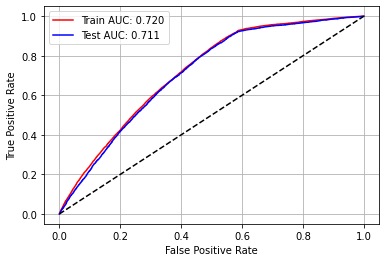

In [108]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-', label= 'Train AUC: %.3f' %auc_train)
plt.plot(fpr_test, tpr_test, 'b-', label= 'Test AUC: %.3f' %auc_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0,1], [0,1], 'k--')
plt.grid()
plt.legend(loc= 'best')
plt.show()

In [109]:
# this indicated that we can get an AUC of ~0.71 with just using datetime features
# the ROC curve is kind of odd since it has that elbow at about (0.91, 0.59)

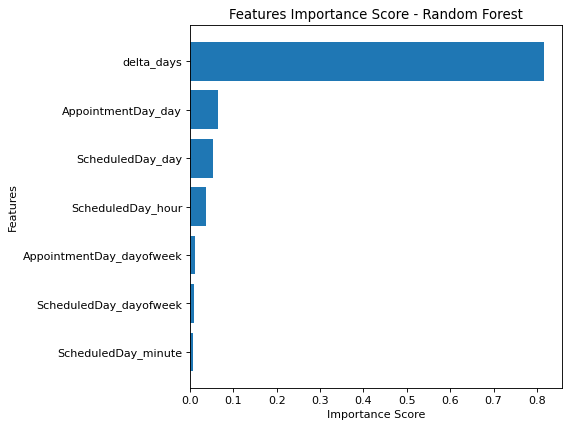

In [117]:
# we can also look for the top features

feature_importances = pd.DataFrame(rf.feature_importances_, 
                                  index= col2use,
                                  columns=['importance']).sort_values('importance', 
                                                                     ascending= False)

num = min([50, len(col2use)])
ylocs = np.arange(num)

# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num = None, figsize= (6,6), dpi=80, facecolor= 'w', edgecolor= 'k')
plt.barh(ylocs, values_to_plot, align = 'center')

plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Features Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

In [ ]:
# this figure shows that the only usable and most used feature is delta_days
# the model is likely to struggle with the same day appointments

# since the training and testing scores are very similar,
# this means we are in the case of high bias
# to improve this model, we will require additional valid features

# conclusion:
    # datetime can have a big impact on machine learning models when used correctly